In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage.interpolation import rotate

In [2]:
cd "\\LINNA\Users\Magpie\Documents\MAGPIE data\2016\Oct_2016\s1013_16 Planar Cu Target - W - Burdiscope\s1013_16 BS"

\\LINNA\Users\Magpie\Documents\MAGPIE data\2016\Oct_2016\s1013_16 Planar Cu Target - W - Burdiscope\s1013_16 BS


In [40]:
zero=plt.imread('s1013_16_134635_c1.png')
bk=plt.imread('s1013_16_134850_c1.png')
sh=plt.imread('s1013_16_135643_c1.png')

<IPython.core.display.Javascript object>


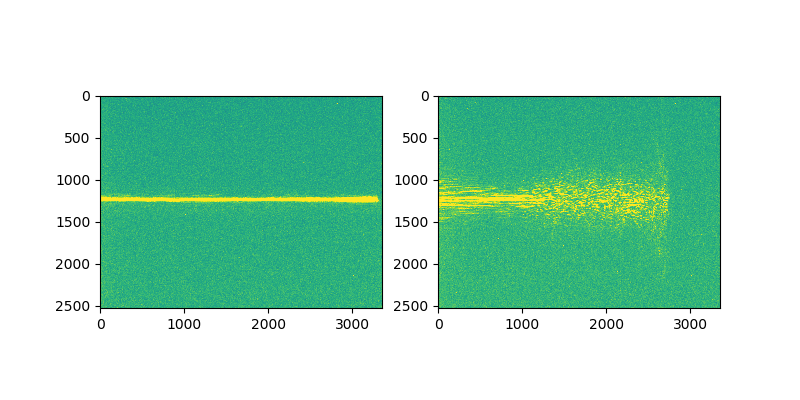

In [41]:
fi,ax=plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(bk, clim=[0,0.01])
ax[1].imshow(sh, clim=[0,0.01])

In [84]:
i=2000
win=10
s=(sh)[:,i-win:i+win].mean(axis=1)
b=(bk)[:,i-win:i+win].mean(axis=1)
z=zero[:,i-win:i+win].mean(axis=1)
sz=s-z
bz=b-z
index=np.arange(0, bz.size)

In [85]:
from lmfit import Model
from lmfit.models import GaussianModel
model=GaussianModel()
pars=model.guess(sz, x=index)
out=model.fit(sz,pars,x=index)

<IPython.core.display.Javascript object>


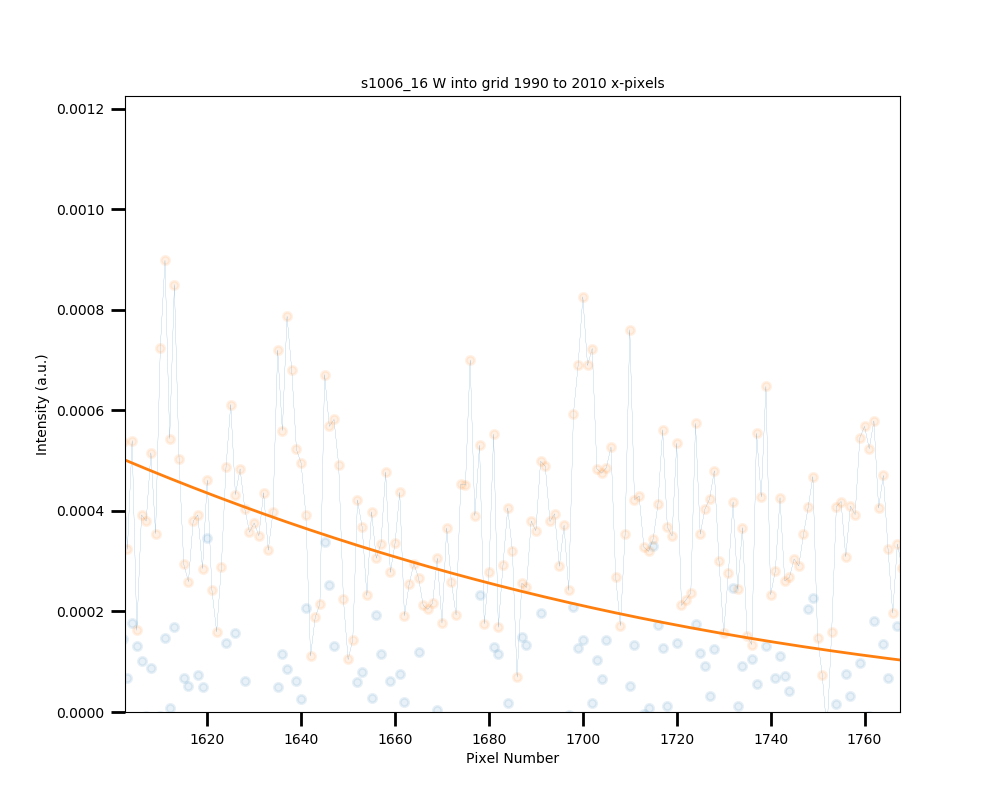

Text(0.5,1,'s1006_16 W into grid 1990 to 2010 x-pixels')

In [90]:
fig, ax=plt.subplots(figsize=(10,8))
ax.scatter(index,bz, lw=2, label='Background', alpha=0.1)
ax.scatter(index,sz, lw=2, label='Shot', alpha=0.1)
ax.plot(index,sz, lw=0.1, label='Shot')

ax.plot(index,out.best_fit, lw=2, label='Fit')

ax.set_ylim([0,0.01])
ax.set_xlim([0, bk.shape[0]])
ax.set_ylabel('Intensity (a.u.)', fontsize=10)
ax.set_xlabel('Pixel Number', fontsize=10)
ax.tick_params(labelsize=10, pad=5, length=10, width=2)
ax.set_title('s1006_16 W into grid '+str(i-win)+' to '+str(i+win)+' x-pixels', fontsize=10)